In [1]:
import pandas as pd

train_dir = '/home/aicontest/construct/data/train.csv'
test_dir = '/home/aicontest/construct/data/test.csv'

train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)

train_df.head()

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
0,TRAIN_00000,2023-12-31 오후 12:44,정규작업 -,맑음,1℃,30%,건축 / 건축물 / 근린생활시설,"4,892.77㎡","지상 14층, 지하 3층",떨어짐(5미터 이상 ~ 10미터 미만),없음,건축 > 철근콘크리트공사,건설자재 > 철근,설치작업,근린생활시설 / 내부,철근 / 고소,"고소작업 중 추락 위험이 있음에도 불구하고, 안전난간대, 안전고리 착용 등 안전장치...",고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
1,TRAIN_00001,2023-12-30 오후 03:35,정규작업 -,맑음,10℃,90%,토목 / 터널 / 철도터널,-,-,끼임,없음,토목 > 터널공사,건설자재 > 볼트,운반작업,철도터널 / 내부,볼트 / 바닥,부주의,재발 방지 대책 마련과 안전교육 실시.
2,TRAIN_00002,2023-12-30 오후 02:30,정규작업 -,맑음,14℃,70%,건축 / 건축물 / 업무시설,"1,994.62㎡","지상 5층, 지하 0층",넘어짐(미끄러짐),없음,건축 > 철근콘크리트공사,기타 > 기타,형틀 및 목공,업무시설 / 내부,기타 / 바닥,3층 슬라브 작업시 이동중 미끄러짐,현장자재 정리와 안전관리 철저를 통한 재발 방지 대책 및 공문 발송을 통한 향후 조...
3,TRAIN_00003,2023-12-30 오후 12:00,휴일근무 -,흐림,12℃,55%,토목 / 하천 / 기타,-,-,기타,전도,토목 > 하천공사,부재 > 교각 기초,조립작업,기타 / 동산교 신축구간,교각 기초 / 바닥,"교각 기초철근 조립 중 강한 바람에 의해 기둥측 주철근이 균형을 잃고 전도되어, 하...","위험성 평가 및 교육을 통해 작업장 내 위험요인과 안전수칙을 근로자에게 전파하고, ..."
4,TRAIN_00004,2023-12-30 오전 10:00,정규작업 -,맑음,0℃,10%,건축 / 건축물 / 공동주택,"59,388.93㎡","지상 27층, 지하 3층",넘어짐(미끄러짐),없음,건축 > 해체 및 철거공사,기타 > 건설폐기물,해체작업,공동주택 / 내부,건설폐기물 / 바닥,근로자의 부주의,자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...


In [2]:
category = ['공사종류', '인적사고', '물적사고', '공종', '사고객체', '작업프로세스', '장소', '부위']
result = {i:{} for i in category}

for i in list(category):
    group = train_df.groupby(i)
    for name, g in group:
        result[i][name] = len(g)
    print(f"{i} : {len(group)} : {[{name : len(g)} for name, g in group]}")

공사종류 : 88 : [{'건축': 1}, {'건축 / 건축물': 27}, {'건축 / 건축물 / 공동주택': 7024}, {'건축 / 건축물 / 공장': 1935}, {'건축 / 건축물 / 관광 휴게시설': 39}, {'건축 / 건축물 / 교육연구시설': 1448}, {'건축 / 건축물 / 교정 및 군사시설': 227}, {'건축 / 건축물 / 근린생활시설': 1400}, {'건축 / 건축물 / 기타': 473}, {'건축 / 건축물 / 노유자시설': 185}, {'건축 / 건축물 / 단독주택': 303}, {'건축 / 건축물 / 동물 및 식물 관련시설': 28}, {'건축 / 건축물 / 묘지관련시설': 12}, {'건축 / 건축물 / 문화 및 집회시설': 443}, {'건축 / 건축물 / 방송통신시설': 65}, {'건축 / 건축물 / 수련시설': 37}, {'건축 / 건축물 / 숙박시설': 345}, {'건축 / 건축물 / 업무시설': 1811}, {'건축 / 건축물 / 운동시설': 242}, {'건축 / 건축물 / 운수시설': 147}, {'건축 / 건축물 / 위락시설': 6}, {'건축 / 건축물 / 위험물 저장 및 처리시설': 49}, {'건축 / 건축물 / 의료시설': 230}, {'건축 / 건축물 / 자동차 관련시설': 190}, {'건축 / 건축물 / 장례시설': 8}, {'건축 / 건축물 / 종교시설': 152}, {'건축 / 건축물 / 지하도상가': 1}, {'건축 / 건축물 / 창고시설': 724}, {'건축 / 건축물 / 판매시설': 176}, {'산업환경설비 / 발전시설': 528}, {'산업환경설비 / 산업생산시설': 3}, {'산업환경설비 / 산업생산시설 / 석유화학공장': 161}, {'산업환경설비 / 산업생산시설 / 제철공장': 5}, {'산업환경설비 / 환경시설': 1}, {'산업환경설비 / 환경시설 / 공공폐수처리시설': 22}, {'산업환경설비 / 환경시설 / 소각장': 30}, {'산업환경설비 / 환경시설 / 수처리설비시

In [18]:
for i in category:
    dt = result[i]
    print(f"{i} : {len(dt)}")

공사종류 : 88
인적사고 : 23
물적사고 : 10
공종 : 49
사고객체 : 120
작업프로세스 : 58
장소 : 1830
부위 : 3695


공사종류
['건축', '건축 / 건축물', '건축 / 건축물 / 공동주택', '건축 / 건축물 / 공장', '건축 / 건축물 / 관광 휴게시설', '건축 / 건축물 / 교육연구시설', '건축 / 건축물 / 교정 및 군사시설', '건축 / 건축물 / 근린생활시설', '건축 / 건축물 / 기타', '건축 / 건축물 / 노유자시설', '건축 / 건축물 / 단독주택', '건축 / 건축물 / 동물 및 식물 관련시설', '건축 / 건축물 / 묘지관련시설', '건축 / 건축물 / 문화 및 집회시설', '건축 / 건축물 / 방송통신시설', '건축 / 건축물 / 수련시설', '건축 / 건축물 / 숙박시설', '건축 / 건축물 / 업무시설', '건축 / 건축물 / 운동시설', '건축 / 건축물 / 운수시설', '건축 / 건축물 / 위락시설', '건축 / 건축물 / 위험물 저장 및 처리시설', '건축 / 건축물 / 의료시설', '건축 / 건축물 / 자동차 관련시설', '건축 / 건축물 / 장례시설', '건축 / 건축물 / 종교시설', '건축 / 건축물 / 지하도상가', '건축 / 건축물 / 창고시설', '건축 / 건축물 / 판매시설', '산업환경설비 / 발전시설', '산업환경설비 / 산업생산시설', '산업환경설비 / 산업생산시설 / 석유화학공장', '산업환경설비 / 산업생산시설 / 제철공장', '산업환경설비 / 환경시설', '산업환경설비 / 환경시설 / 공공폐수처리시설', '산업환경설비 / 환경시설 / 소각장', '산업환경설비 / 환경시설 / 수처리설비시설', '산업환경설비 / 환경시설 / 중수도/하폐수처리수 재이용시설', '산업환경설비 / 환경시설 / 하수처리시설', '산업환경설비 / 환경시설 / 환경오염방지시설', '조경 / 공원', '조경 / 기타', '조경 / 생태공원', '조경 / 수목원', '조경 / 숲', '조경 / 정원', '토목 / 공동구', '토목 / 교량 / 기타', '토목 / 교량 / 도로교량', '토목 / 교량 / 복개구조물', '토목 / 교량 / 철도교량

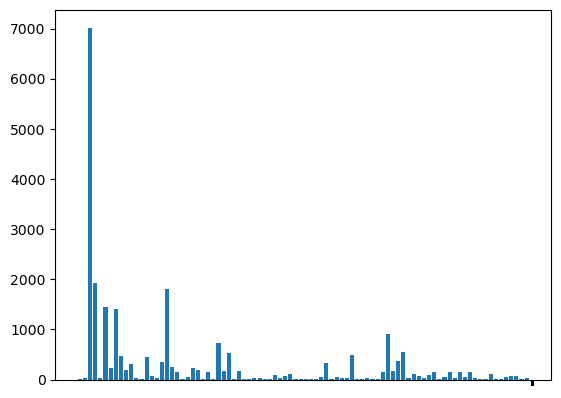

인적사고
['감전', '교통사고', '기타', '깔림', '끼임', '넘어짐(기타)', '넘어짐(물체에 걸림)', '넘어짐(미끄러짐)', '떨어짐(10미터 이상)', '떨어짐(2미터 미만)', '떨어짐(2미터 이상 ~ 3미터 미만)', '떨어짐(3미터 이상 ~ 5미터 미만)', '떨어짐(5미터 이상 ~ 10미터 미만)', '떨어짐(분류불능)', '물체에 맞음', '부딪힘', '분류불능', '없음', '절단, 베임', '질병', '질식', '찔림', '화상']


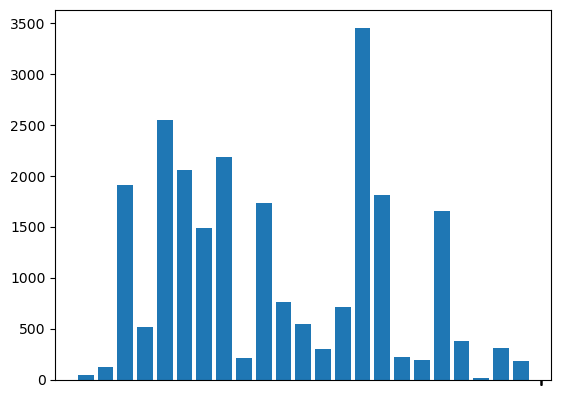

물적사고
['기타', '낙하', '붕괴', '없음', '전도', '충돌', '탈락', '파열,파단', '폭발', '화재']


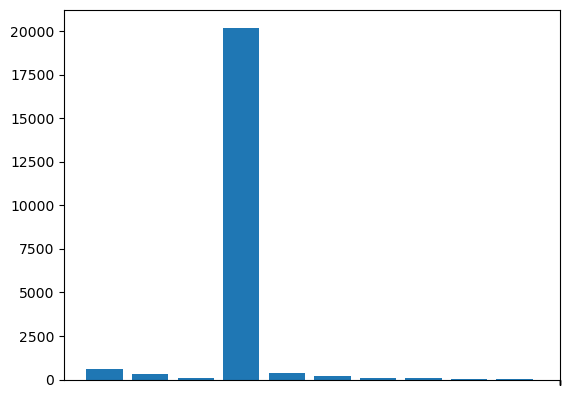

공종
['건축 > 가설공사', '건축 > 건축 토공사', '건축 > 건축물 부대공사', '건축 > 금속공사', '건축 > 도장공사', '건축 > 목공사', '건축 > 미장공사', '건축 > 방수공사', '건축 > 수장공사', '건축 > 조경공사', '건축 > 조적공사', '건축 > 지반조사', '건축 > 지붕 및 홈통공사', '건축 > 지정공사', '건축 > 창호 및 유리공사', '건축 > 철골공사', '건축 > 철근콘크리트공사', '건축 > 타일 및 돌공사', '건축 > 특수 건축물공사', '건축 > 해체 및 철거공사', '기계설비 > 가설공사', '기계설비 > 기계설비공사', '기계설비 > 해체 및 철거공사', '기타 > 기타', '산업설비 > 가설공사', '산업설비 > 산업설비공사', '산업설비 > 해체 및 철거공사', '전기설비 > 가설공사', '전기설비 > 전기설비공사', '전기설비 > 해체 및 철거공사', '토목 > 가설공사', '토목 > 강구조물공사', '토목 > 관공사', '토목 > 관공사 부대공사', '토목 > 교량공사', '토목 > 댐 및 제방공사', '토목 > 도로 및 포장공사', '토목 > 말뚝공사', '토목 > 지반개량공사', '토목 > 지반조사', '토목 > 철근콘크리트공사', '토목 > 철도 및 궤도공사', '토목 > 터널공사', '토목 > 토공사', '토목 > 프리캐스트 콘크리트공사', '토목 > 하천공사', '토목 > 항만공사', '토목 > 해체 및 철거공사', '통신설비 > 통신설비공사']


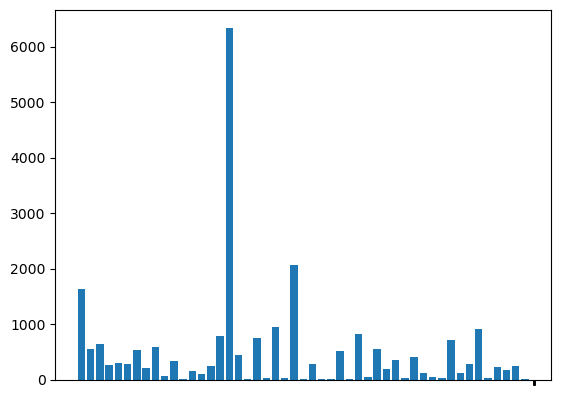

사고객체
['가시설 > RCS발판', '가시설 > 가물막이', '가시설 > 가새', '가시설 > 가설계단', '가시설 > 가설도로', '가시설 > 강관동바리', '가시설 > 거푸집', '가시설 > 기타 가시설', '가시설 > 낙하물방지망', '가시설 > 띠장', '가시설 > 방호선반', '가시설 > 버팀대', '가시설 > 버팀보', '가시설 > 벽이음', '가시설 > 복공판', '가시설 > 브라켓', '가시설 > 비계', '가시설 > 수평연결재', '가시설 > 시스템동바리', '가시설 > 안전시설물', '가시설 > 안전핀', '가시설 > 엄지말뚝', '가시설 > 작업발판', '가시설 > 잭서포트', '가시설 > 전도방지재', '가시설 > 지주가설재', '가시설 > 지지대', '가시설 > 지하벽체', '가시설 > 클라이밍콘', '가시설 > 특수거푸집(갱폼 등)', '가시설 > 흙막이가시설', '건설공구 > 공구류', '건설공구 > 몰탈혼합기', '건설공구 > 사다리', '건설기계 > 고소작업차(고소작업대 등)', '건설기계 > 골재살포기', '건설기계 > 공기압축기', '건설기계 > 굴착기', '건설기계 > 기중기(이동식크레인 등)', '건설기계 > 노상안정기', '건설기계 > 덤프트럭', '건설기계 > 로더', '건설기계 > 롤러', '건설기계 > 모터그레이더', '건설기계 > 불도저', '건설기계 > 쇄석기', '건설기계 > 아스팔트살포기', '건설기계 > 아스팔트피니셔', '건설기계 > 어스오거', '건설기계 > 준설선', '건설기계 > 지게차', '건설기계 > 천공기', '건설기계 > 콘크리트믹서트럭', '건설기계 > 콘크리트뱃칭플랜트', '건설기계 > 콘크리트살포기', '건설기계 > 콘크리트펌프', '건설기계 > 콘크리트피니셔', '건설기계 > 타워크레인', '건설기계 > 특수건설기계', '건설기계 > 항타 및 항발기', '건설자재 > 덕트', '건설자재 > 데크플레이트', '건설자재 > 레일', '건설자재 > 볼트', '건설자재 > 선라이트', '건설

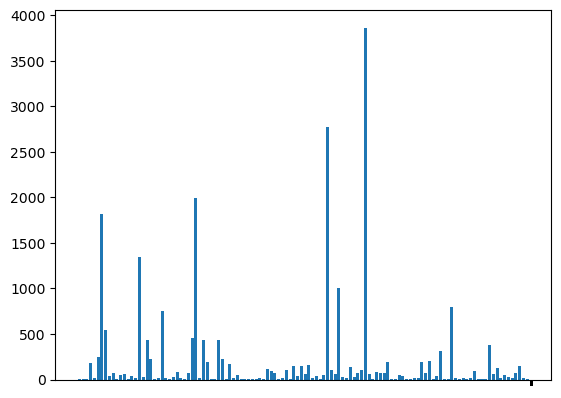

작업프로세스
['거치작업', '고소작업', '고정작업', '교체작업', '굴착작업', '기타', '다짐작업', '도장작업', '돌붙임 및 줄눈 작업', '마감작업', '매설작업', '물뿌리기 작업', '반출작업', '벌목작업', '보수 및 교체작업', '부설 및 다짐작업', '상차 및 하역작업', '설비작업', '설치작업', '수정작업', '쌓기작업', '양생작업', '양중작업', '연결작업', '용접작업', '운반작업', '이동', '인발작업', '인양작업', '자재이동', '자재정리', '작업장 출입', '장비이동', '장약 및 발파작업', '적재작업', '전기배선작업', '전기작업', '절단작업', '절취작업', '점검', '정리작업', '정비작업', '정지작업', '제거작업', '조립작업', '준비작업', '천공작업', '철거작업', '철근조립작업', '청소작업', '측량작업', '타설작업', '토사하역', '평탄작업', '항타 및 항발작업', '해체작업', '형틀 및 목공', '확인 및 점검작업']


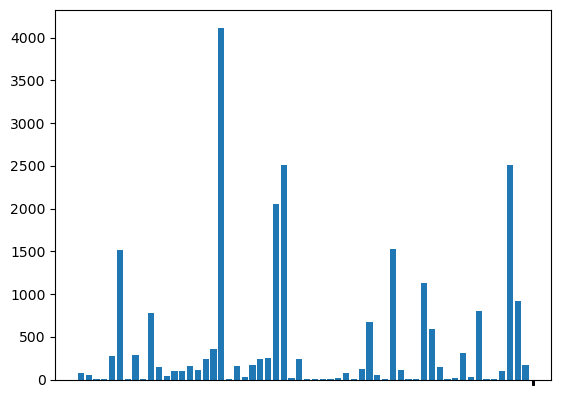

장소
[' / 외부', '/', '/ Coal Shed 입구', '/ HRSG Casing 상부', '/ HRSG 남측', '/ LNG TANK ROOF', '/ LNG TANK 내부벽', '/ Pipe rack 상부', '/ STG', '/ STG 2층 구간', '/ ST동 중층', '/ 가드레일 내측', '/ 가설 출입문', '/ 가시설 내부', '/ 강릉안인 1,2호기 현장', '/ 경기도 고양시 일산동구 중앙로 1206 뉴코아백화점 옆 수목', '/ 경산시 계양동 297-2번지 남매근린공원 일원', '/ 고속도로 성토부', '/ 고속도로변', '/ 공구실', '/ 공사현장 Yard', '/ 공사현장 내', '/ 공원 현장 내', '/ 공원조성 공사 현장 내', '/ 공장내부 3층', '/ 관로공사구간', '/ 국사리 산194-3임', '/ 근로자 운송용 통선', '/ 남산예장자락 외부 현장', '/ 내부', '/ 댐 배면', '/ 데크설치 작업장소', '/ 돌 쌓기 작업장 주변', '/ 돌틈쌓기', '/ 북구 효암로 84-1앞', '/ 북측 담장', '/ 분류불능', '/ 사업장 외부 공영주차장', '/ 사업현장 내 느티나무', '/ 사유지', '/ 사천면 중앙동로 43', '/ 선박', '/ 수중', '/ 없음', '/ 여좌지구 공사현장 내', '/ 영업소회차로 녹지대', '/ 완충녹지대', '/ 외벽', '/ 외부', '/ 의령읍 무전리 산31-2', '/ 인접주변', '/ 자재 상하차 시', '/ 장비수리', '/ 잭업바지', '/ 제관 SHOP장', '/ 주차장', '/ 지구 내 소공원', '/ 지붕', '/ 질병성', '/ 철탑', '/ 컨테이너 휴게실', '/ 터널', '/ 터빈1호기', '/ 터빈동 1호기', '/ 테이블가든', '/ 풍력단지 내 GIS장치', '/ 필지 내(구조물 없음)', '/ 하도급사 가설사무실', '/ 하부 바닥', '/ 현장 내', '/ 현장 외부 야적장', '/ 현장 정문', '/ 현장 출입구', '/ 협력사 컨테

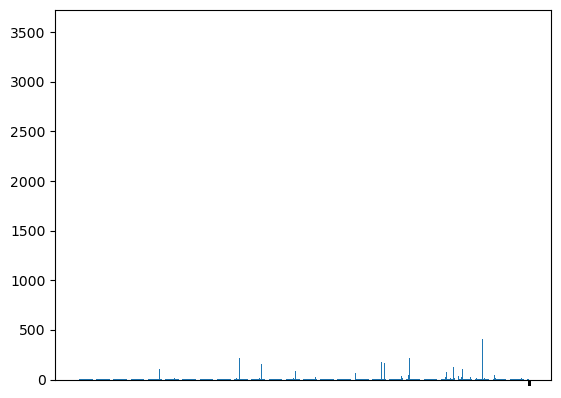

부위
['/', '/ 계단', '/ 고소', '/ 공사 현장 내', '/ 근로자쉼터', '/ 기타', '/ 뒤', '/ 바닥', '/ 상부(위)', '/ 생산시설물 2층', '/ 소음', '/ 앞', '/ 엘레베이터 승강로', '/ 옆', '/ 외부 자재적치장', '/ 지하', '/ 하부(아래)', '/ 화장실', 'PSC빔 /', 'PSC빔 / 거더 강연선 정착대', 'PSC빔 / 상부(위)', 'PSC빔 / 앞', 'PSC빔 / 하부(아래)', 'RCS발판 / 고소', 'RCS발판 / 바닥', 'RCS발판 / 상부(위)', '가물막이 / 바닥', '가물막이 / 지면', '가새 / 바닥', '가새 / 상부(위)', '가새 / 야적장', '가새 / 토공사 복공판 하부', '가설계단 /', '가설계단 / 103동 2층 계단실', '가설계단 / 2층 가설계단', '가설계단 / 가설계단에서', '가설계단 / 계단과 계단사이', '가설계단 / 계단실', '가설계단 / 고소', '가설계단 / 기존 계단', '가설계단 / 난간', '가설계단 / 높이 87CM 계단 (사진첨부)', '가설계단 / 단지 내 어린이집 앞', '가설계단 / 도입부', '가설계단 / 뒤로 넘어지면서 허리에 충격이 가해짐', '가설계단 / 마지막계단 2~3단', '가설계단 / 바닥', '가설계단 / 상부(위)', '가설계단 / 안전계단 발판 및 손잡이', '가설계단 / 앞', '가설계단 / 옆', '가설계단 / 옥상계단발판하부', '가설계단 / 중간발판', '가설계단 / 지표로 부터 두번째 계단', '가설계단 / 지하', '가설계단 / 찬넬', '가설계단 / 캐노피 타설비계 설치구간', '가설계단 / 하부(아래)', '가설도로 /', '가설도로 / 바닥', '가설도로 / 보행자 통로', '가설도로 / 설치장소', '가설도로 / 앞', '가설도로 / 지하차도 입구', '가설도로 / 하부(아래)', '강관동바리 /', '강관동바리 / 2층', '강관동바리 / 강관동바리를 들고 이동중에 떨어지면서 동바리

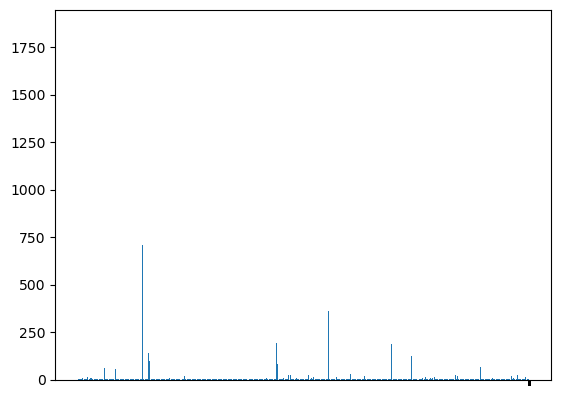

In [ ]:
import matplotlib.pyplot as plt

for i in category:
    print(i)
    dt = result[i]
    x = list(dt.keys())
    y = list(dt.values())
    plt.bar(x, y)
    plt.xticks(["" for _ in range(len(x))])

    plt.show()

In [41]:
for i in category:
    dt = result[i]
    print(i)
    print(sorted(dt.items(), key=lambda x: -x[1]))

공사종류
[('건축 / 건축물 / 공동주택', 7024), ('건축 / 건축물 / 공장', 1935), ('건축 / 건축물 / 업무시설', 1811), ('건축 / 건축물 / 교육연구시설', 1448), ('건축 / 건축물 / 근린생활시설', 1400), ('토목 / 도로 / 도로', 906), ('건축 / 건축물 / 창고시설', 724), ('토목 / 상하수도 / 하수도', 555), ('산업환경설비 / 발전시설', 528), ('토목 / 기타 / 부지조성', 483), ('건축 / 건축물 / 기타', 473), ('건축 / 건축물 / 문화 및 집회시설', 443), ('토목 / 상하수도 / 상수도', 374), ('건축 / 건축물 / 숙박시설', 345), ('토목 / 교량 / 도로교량', 339), ('건축 / 건축물 / 단독주택', 303), ('건축 / 건축물 / 운동시설', 242), ('건축 / 건축물 / 의료시설', 230), ('건축 / 건축물 / 교정 및 군사시설', 227), ('건축 / 건축물 / 자동차 관련시설', 190), ('건축 / 건축물 / 노유자시설', 185), ('건축 / 건축물 / 판매시설', 176), ('토목 / 상하수도 / 기타', 162), ('산업환경설비 / 산업생산시설 / 석유화학공장', 161), ('토목 / 하천 / 기타', 154), ('건축 / 건축물 / 종교시설', 152), ('토목 / 철도 / 지하철', 152), ('토목 / 터널 / 도로터널', 151), ('건축 / 건축물 / 운수시설', 147), ('토목 / 도로 / 기타', 147), ('토목 / 터널 / 철도터널', 145), ('조경 / 기타', 106), ('토목 / 옹벽 및 절토사면 / 옹벽', 103), ('토목 / 하천 / 제방(통관/호안)', 103), ('토목 / 철도 / 일반 및 고속철도', 90), ('산업환경설비 / 환경시설 / 하수처리시설', 86), ('토목 / 항만 / 기타', 68), ('조경 / 공원', 66),

In [36]:
train_df.columns

Index(['ID', '발생일시', '사고인지 시간', '날씨', '기온', '습도', '공사종류', '연면적', '층 정보',
       '인적사고', '물적사고', '공종', '사고객체', '작업프로세스', '장소', '부위', '사고원인',
       '재발방지대책 및 향후조치계획'],
      dtype='object')

선정
인적사고
작업프로세스
사고객체 ( 기타 있음 )
장소 ( / 뒤에 없는 경우 있음)

선택적 사용
물적사고 (없음 제거) 
부위 ( / 제거)

In [44]:
category = ['공사종류', '인적사고', '물적사고', '공종', '사고객체', '작업프로세스', '장소', '부위']
result = {i:{} for i in category}

for i in list(category):
    group = test_df.groupby(i)
    for name, g in group:
        result[i][name] = len(g)
    print(f"{i} : {len(group)} : {[{name : len(g)} for name, g in group]}")

공사종류 : 58 : [{'건축 / 건축물 / 공동주택': 242}, {'건축 / 건축물 / 공장': 48}, {'건축 / 건축물 / 관광 휴게시설': 2}, {'건축 / 건축물 / 교육연구시설': 109}, {'건축 / 건축물 / 교정 및 군사시설': 22}, {'건축 / 건축물 / 근린생활시설': 46}, {'건축 / 건축물 / 기타': 24}, {'건축 / 건축물 / 노유자시설': 15}, {'건축 / 건축물 / 단독주택': 7}, {'건축 / 건축물 / 묘지관련시설': 3}, {'건축 / 건축물 / 문화 및 집회시설': 22}, {'건축 / 건축물 / 방송통신시설': 6}, {'건축 / 건축물 / 숙박시설': 19}, {'건축 / 건축물 / 업무시설': 63}, {'건축 / 건축물 / 운동시설': 10}, {'건축 / 건축물 / 운수시설': 12}, {'건축 / 건축물 / 위험물 저장 및 처리시설': 1}, {'건축 / 건축물 / 의료시설': 9}, {'건축 / 건축물 / 자동차 관련시설': 5}, {'건축 / 건축물 / 종교시설': 6}, {'건축 / 건축물 / 창고시설': 14}, {'건축 / 건축물 / 판매시설': 15}, {'산업환경설비 / 발전시설': 12}, {'산업환경설비 / 산업생산시설 / 석유화학공장': 3}, {'산업환경설비 / 산업생산시설 / 제철공장': 1}, {'산업환경설비 / 환경시설 / 소각장': 4}, {'산업환경설비 / 환경시설 / 수처리설비시설': 3}, {'산업환경설비 / 환경시설 / 하수처리시설': 5}, {'산업환경설비 / 환경시설 / 환경오염방지시설': 2}, {'조경 / 공원': 2}, {'조경 / 기타': 6}, {'조경 / 생태공원': 2}, {'토목 / 교량 / 기타': 1}, {'토목 / 교량 / 도로교량': 19}, {'토목 / 기타 / 부지조성': 18}, {'토목 / 댐 / 기타': 2}, {'토목 / 댐 / 용수전용댐': 1}, {'토목 / 도로 / 기타': 11}, {'토목 / 도로 / 도로': 

In [45]:
for i in category:
    dt = result[i]
    print(i)
    print(sorted(dt.items(), key=lambda x: -x[1]))

공사종류
[('건축 / 건축물 / 공동주택', 242), ('건축 / 건축물 / 교육연구시설', 109), ('건축 / 건축물 / 업무시설', 63), ('건축 / 건축물 / 공장', 48), ('건축 / 건축물 / 근린생활시설', 46), ('토목 / 도로 / 도로', 40), ('토목 / 상하수도 / 하수도', 35), ('건축 / 건축물 / 기타', 24), ('토목 / 상하수도 / 상수도', 23), ('건축 / 건축물 / 교정 및 군사시설', 22), ('건축 / 건축물 / 문화 및 집회시설', 22), ('건축 / 건축물 / 숙박시설', 19), ('토목 / 교량 / 도로교량', 19), ('토목 / 철도 / 지하철', 19), ('토목 / 기타 / 부지조성', 18), ('건축 / 건축물 / 노유자시설', 15), ('건축 / 건축물 / 판매시설', 15), ('건축 / 건축물 / 창고시설', 14), ('건축 / 건축물 / 운수시설', 12), ('산업환경설비 / 발전시설', 12), ('토목 / 도로 / 기타', 11), ('건축 / 건축물 / 운동시설', 10), ('건축 / 건축물 / 의료시설', 9), ('토목 / 옹벽 및 절토사면 / 옹벽', 9), ('토목 / 터널 / 철도터널', 8), ('건축 / 건축물 / 단독주택', 7), ('건축 / 건축물 / 방송통신시설', 6), ('건축 / 건축물 / 종교시설', 6), ('조경 / 기타', 6), ('건축 / 건축물 / 자동차 관련시설', 5), ('산업환경설비 / 환경시설 / 하수처리시설', 5), ('토목 / 철도 / 일반 및 고속철도', 5), ('토목 / 하천 / 기타', 5), ('산업환경설비 / 환경시설 / 소각장', 4), ('토목 / 상하수도 / 기타', 4), ('토목 / 하천 / 배수펌프장', 4), ('건축 / 건축물 / 묘지관련시설', 3), ('산업환경설비 / 산업생산시설 / 석유화학공장', 3), ('산업환경설비 / 환경시설 / 수처리설비시설', 3), ('토목

In [8]:
from collections import Counter

word_list = []
for i in train_df['재발방지대책 및 향후조치계획']:
    k = list(i.split(' '))
    for l in k:
        word_list.append(l)

count_word = Counter(word_list)
count_word

Counter({'및': 21199,
         '작업': 10176,
         '안전교육': 9113,
         '재발': 8526,
         '통한': 8297,
         '방지': 8057,
         '교육': 7128,
         '시': 7099,
         '근로자': 4907,
         '조치': 4589,
         '현장': 4490,
         '작업자': 4311,
         '대한': 4102,
         '전': 4083,
         '계획.': 4011,
         '실시와': 3979,
         '실시.': 3676,
         '안전': 3655,
         '향후': 3609,
         '위한': 3550,
         '대책': 3543,
         '실시,': 3194,
         '후': 2871,
         '사고': 2860,
         '실시': 2286,
         '관리': 2134,
         '철저': 1978,
         '안전관리': 1913,
         '대책.': 1858,
         '확인': 1827,
         '실시를': 1734,
         '방지를': 1681,
         '대책과': 1648,
         '안전사고': 1509,
         '자재': 1508,
         '점검': 1494,
         '착용': 1437,
         '철저,': 1355,
         '마련.': 1326,
         '철저.': 1284,
         '내': 1259,
         '설치': 1259,
         '발생': 1255,
         '사고사례': 1205,
         '전파': 1183,
         '사용': 1143,
         '철저와': 

In [17]:
idx_2p = []

for idx, i in enumerate(train_df['재발방지대책 및 향후조치계획']):
    ans = i.split(" ")
    if '2인' in ans or '1조' in ans:
        idx_2p.append(idx)

train_fillter = train_df.iloc[idx_2p]
train_fillter.head()

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
19,TRAIN_00019,2023-12-29 오후 12:00,정규작업 -,맑음,4℃,70%,건축 / 건축물 / 공동주택,"207,997㎡","지상 34층, 지하 3층",부딪힘,없음,건축 > 타일 및 돌공사,건설자재 > 자재,양중작업,공동주택 / 외부,자재 / 바닥,넘어지는 타일을 지지하다 피하는 과정에서 타일에 왼쪽 발을 부딪힘,"양중 작업 시 기준무게(25kg) 이상 운반을 위한 2인 1조 작업 교육, 자재 전..."
59,TRAIN_00059,2023-12-27 오후 03:30,정규작업 -,맑음,6℃,70%,건축 / 건축물 / 창고시설,665㎡,"지상 1층, 지하 0층",넘어짐(미끄러짐),없음,건축 > 지붕 및 홈통공사,건설공구 > 사다리,마감작업,창고시설 / 외부,사다리 / 고소,사다리 위에서 실리콘 작업을 마치고 내려오던 중 미끄러져 넘어지면서 안전모가 벗겨져...,"이동식 사다리 사용 시 2인 1조 작업 및 최상부 발판에서 작업 금지, 안전수칙 준..."
83,TRAIN_00083,2023-12-26 오후 01:55,정규작업 -,맑음,10℃,77%,건축 / 건축물 / 공동주택,"188,448㎡","지상 49층, 지하 4층","절단, 베임",없음,건축 > 가설공사,건설공구 > 공구류,절단작업,공동주택 / 내부,공구류 / 바닥,"판넬 절단 작업시 2인1조 작업 미 준수 및 작업대 미사용, 절단 작업 기준 미준수","2인 1조 작업 실시, 절단 자재 고정을 위한 고정 바이스 사용, 미숙련공 작업 금..."
94,TRAIN_00094,2023-12-26 오전 09:30,정규작업 -,맑음,2℃,60%,건축 / 건축물 / 업무시설,"72,175.33㎡","지상 11층, 지하 5층",기타,없음,건축 > 철근콘크리트공사,질병 > 질병,운반작업,업무시설 / 내부,질병 / 통증,몰탈을 용기에 담아 1.2M 높이 발판에 올리려다 어깨에 통증을 느끼고 퇴근 후까지...,작업 전/중/후 수시로 스트레칭을 실시하고 소운반 작업 시 2인 1조 작업을 시행하...
95,TRAIN_00095,2023-12-26 오전 09:20,정규작업 -,맑음,6℃,60%,건축 / 건축물 / 교육연구시설,"22,386.58㎡","지상 4층, 지하 1층",떨어짐(2미터 미만),없음,건축 > 미장공사,가시설 > 작업발판,마감작업,교육연구시설 / 내부,작업발판 / 바닥,작업자가 양손에 작업 공구를 들고 작업발판을 내려오다 발을 헛디뎌 넘어지며 손목에 ...,"작업 전 말비계 안전작업 지침과 안전작업 절차에 대한 안전교육 실시, 작업자의 안전..."


In [22]:
category = ['공사종류', '인적사고', '물적사고', '부위', '공종', '사고객체', '작업프로세스', '장소', '부위']
result = {i:{} for i in category}

for i in list(category):
    group = train_fillter.groupby(i)
    for name, g in group:
        result[i][name] = len(g)
    print(f"{i} : {len(group)} : {[{name : len(g)} for name, g in group]}")

공사종류 : 56 : [{'건축 / 건축물': 1}, {'건축 / 건축물 / 공동주택': 251}, {'건축 / 건축물 / 공장': 44}, {'건축 / 건축물 / 교육연구시설': 46}, {'건축 / 건축물 / 교정 및 군사시설': 5}, {'건축 / 건축물 / 근린생활시설': 37}, {'건축 / 건축물 / 기타': 10}, {'건축 / 건축물 / 노유자시설': 6}, {'건축 / 건축물 / 단독주택': 3}, {'건축 / 건축물 / 동물 및 식물 관련시설': 1}, {'건축 / 건축물 / 문화 및 집회시설': 14}, {'건축 / 건축물 / 수련시설': 1}, {'건축 / 건축물 / 숙박시설': 9}, {'건축 / 건축물 / 업무시설': 72}, {'건축 / 건축물 / 운동시설': 8}, {'건축 / 건축물 / 운수시설': 7}, {'건축 / 건축물 / 의료시설': 9}, {'건축 / 건축물 / 자동차 관련시설': 2}, {'건축 / 건축물 / 종교시설': 4}, {'건축 / 건축물 / 창고시설': 22}, {'건축 / 건축물 / 판매시설': 6}, {'산업환경설비 / 발전시설': 23}, {'산업환경설비 / 산업생산시설 / 석유화학공장': 6}, {'산업환경설비 / 환경시설 / 공공폐수처리시설': 1}, {'산업환경설비 / 환경시설 / 수처리설비시설': 1}, {'산업환경설비 / 환경시설 / 하수처리시설': 5}, {'산업환경설비 / 환경시설 / 환경오염방지시설': 1}, {'조경 / 기타': 1}, {'조경 / 정원': 1}, {'토목 / 공동구': 2}, {'토목 / 교량 / 기타': 2}, {'토목 / 교량 / 도로교량': 7}, {'토목 / 기타': 2}, {'토목 / 기타 / 부지조성': 9}, {'토목 / 댐 / 다목적댐': 2}, {'토목 / 댐 / 용수전용댐': 1}, {'토목 / 도로 / 기타': 2}, {'토목 / 도로 / 도로': 27}, {'토목 / 상하수도 / 기타': 4}, {'토목 / 상하수도 / 상수도': 12}, {'토목 

In [23]:
for i in category:
    dt = result[i]
    print(i)
    print(sorted(dt.items(), key=lambda x: -x[1]))

공사종류
[('건축 / 건축물 / 공동주택', 251), ('건축 / 건축물 / 업무시설', 72), ('건축 / 건축물 / 교육연구시설', 46), ('건축 / 건축물 / 공장', 44), ('건축 / 건축물 / 근린생활시설', 37), ('토목 / 도로 / 도로', 27), ('산업환경설비 / 발전시설', 23), ('건축 / 건축물 / 창고시설', 22), ('건축 / 건축물 / 문화 및 집회시설', 14), ('토목 / 상하수도 / 하수도', 14), ('토목 / 상하수도 / 상수도', 12), ('건축 / 건축물 / 기타', 10), ('건축 / 건축물 / 숙박시설', 9), ('건축 / 건축물 / 의료시설', 9), ('토목 / 기타 / 부지조성', 9), ('건축 / 건축물 / 운동시설', 8), ('토목 / 철도 / 지하철', 8), ('건축 / 건축물 / 운수시설', 7), ('토목 / 교량 / 도로교량', 7), ('건축 / 건축물 / 노유자시설', 6), ('건축 / 건축물 / 판매시설', 6), ('산업환경설비 / 산업생산시설 / 석유화학공장', 6), ('건축 / 건축물 / 교정 및 군사시설', 5), ('산업환경설비 / 환경시설 / 하수처리시설', 5), ('건축 / 건축물 / 종교시설', 4), ('토목 / 상하수도 / 기타', 4), ('토목 / 철도 / 일반 및 고속철도', 4), ('토목 / 터널 / 도로터널', 4), ('건축 / 건축물 / 단독주택', 3), ('토목 / 하천 / 기타', 3), ('토목 / 항만 / 방파제', 3), ('건축 / 건축물 / 자동차 관련시설', 2), ('토목 / 공동구', 2), ('토목 / 교량 / 기타', 2), ('토목 / 기타', 2), ('토목 / 댐 / 다목적댐', 2), ('토목 / 도로 / 기타', 2), ('토목 / 옹벽 및 절토사면 / 옹벽', 2), ('토목 / 터널 / 기타', 2), ('토목 / 터널 / 철도터널', 2), ('토목 / 하천 / 배수펌프장', 2), (

공사종류


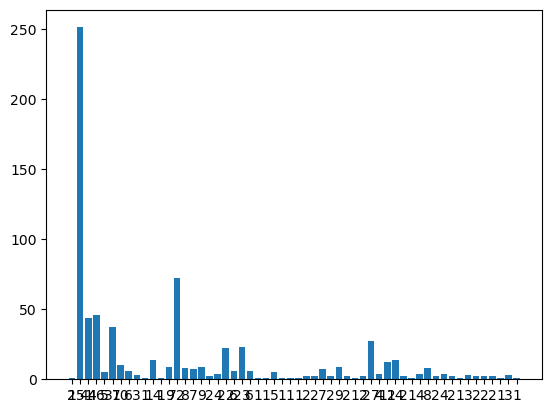

인적사고


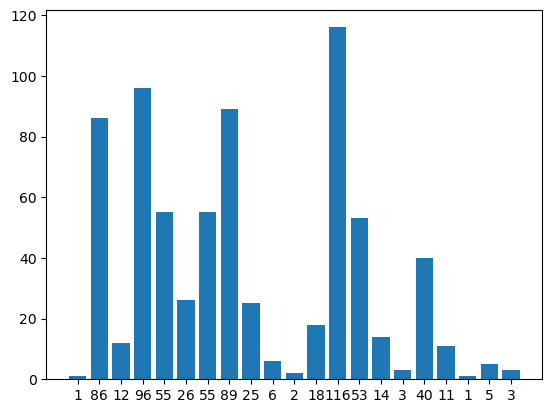

물적사고


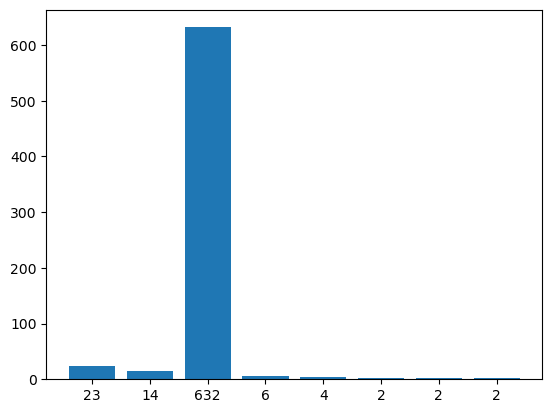

부위


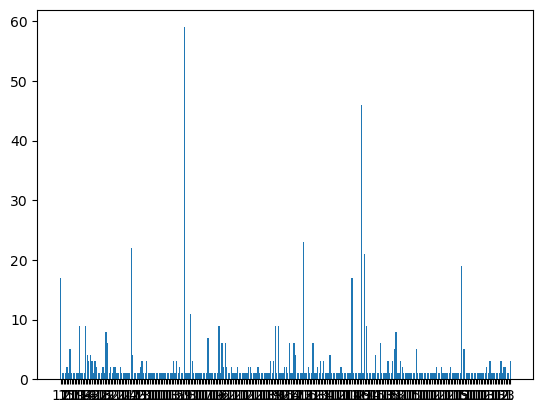

공종


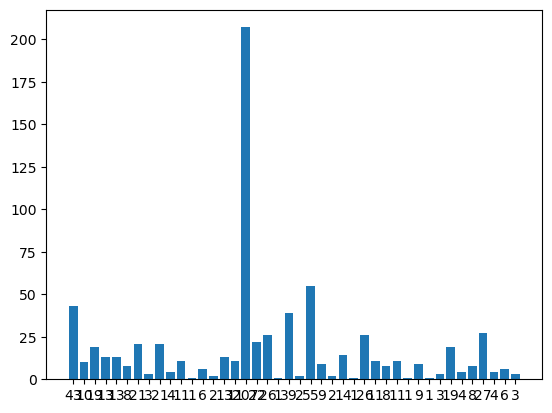

사고객체


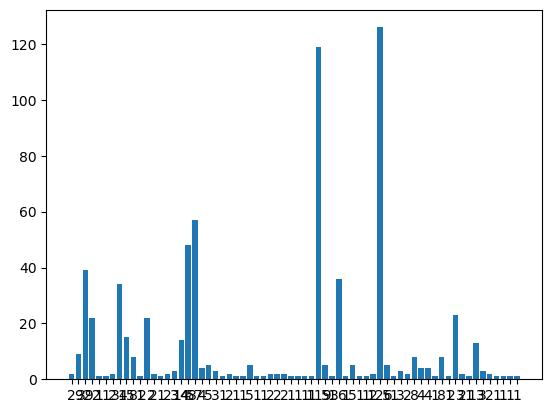

작업프로세스


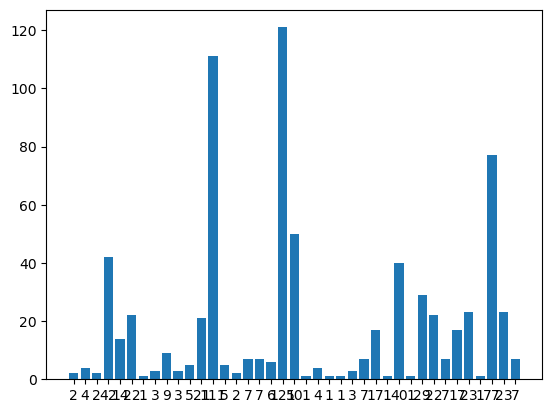

장소


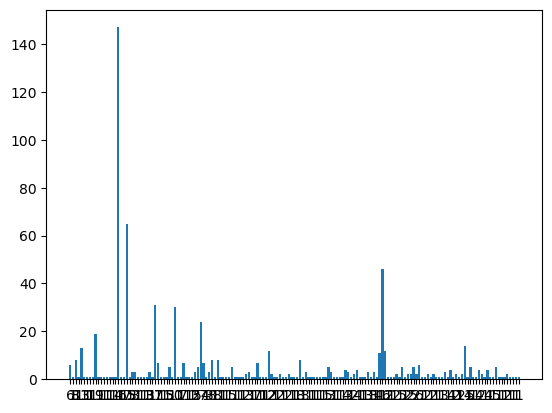

부위


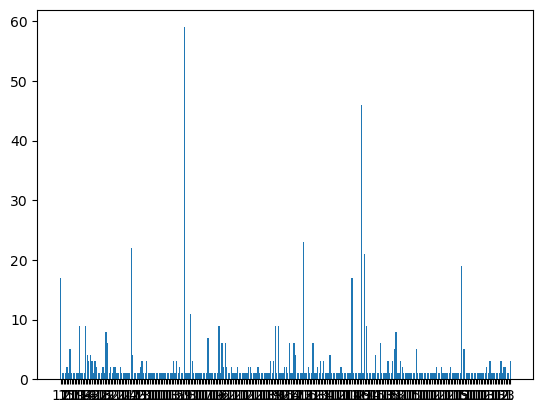

In [24]:
import matplotlib.pyplot as plt

for i in category:
    print(i)
    dt = result[i]
    x = list(dt.keys())
    y = list(dt.values())
    plt.bar(x, y)
    plt.xticks(x, y)

    plt.show()